In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
numb_x_src_path = '../../Dataset/MixedDataRed.json'
y_src_path = '../../DataBook/Mixed_Data_Analyst.xlsx'

In [21]:
numb_data = pd.read_json(numb_x_src_path)
numb_data = numb_data.iloc[:, :-30000]

In [50]:
# nanCal = numb_data.isna().sum(axis=1)
# print(np.mean(nanCal)) // prints average number of missing nan
numb_data 

,0,1,2,3,4,5,6,7,8,9,...,20464,20465,20466,20467,20468,20469,20470,20471,20472,20473
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2972.0,2972.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0.0,0.0,0.0,0.0,347.0,347.0,347.0,279.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1160.0,1159.0,1160.0,1159.0,1161.0,1160.0,1161.0,1160.0,1162.0,1161.0
129,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_supervision = pd.read_excel(y_src_path)
plagiarised_array = df_supervision['Plagiarised'].astype(int).values

In [43]:
X_N = np.nan_to_num(numb_data.values, nan=0, copy=True).astype(int)
y = plagiarised_array

In [44]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N, y, test_size=0.2, random_state=32)

In [36]:
# scaler = StandardScaler()
# X_N_train = scaler.fit_transform(X_N_train)
# X_N_test = scaler.fit_transform(X_N_test)

In [45]:
numbP = Perceptron()
numbP.fit(X_N_train,y_N_train)

percepPredict = numbP.predict(X_N_test)

print(f"Training data score: {numbP.score(X_N_train, y_N_train)}")
print(f"Test data score: {numbP.score(X_N_test, y_N_test)}")

Training data score: 0.9433962264150944
Test data score: 0.8888888888888888


In [46]:
NPH = 32
numb_model = keras.models.Sequential([
    keras.layers.Input(shape=(20474,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(NPH, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

LOSS_FN = keras.losses.BinaryCrossentropy()

numb_model.compile(optimizer='adam', loss=LOSS_FN, metrics=['accuracy'])

history = numb_model.fit(X_N_train, y_N_train, epochs=100, validation_data=(X_N_test, y_N_test))

y_pred_numb_binary_flat = (numb_model.predict(X_N_test).flatten() > 0.5).astype(int)

Epoch 1/100
4/4 [==============================] - 1s 75ms/step - loss: 1344.5583 - accuracy: 0.2547 - val_loss: 11.3303 - val_accuracy: 0.9630
Epoch 2/100
4/4 [==============================] - 0s 35ms/step - loss: 237.9887 - accuracy: 0.6509 - val_loss: 65.8607 - val_accuracy: 0.8519
Epoch 3/100
4/4 [==============================] - 0s 36ms/step - loss: 247.7914 - accuracy: 0.8491 - val_loss: 74.7549 - val_accuracy: 0.8519
Epoch 4/100
4/4 [==============================] - 0s 38ms/step - loss: 250.6458 - accuracy: 0.8585 - val_loss: 66.0967 - val_accuracy: 0.8519
Epoch 5/100
4/4 [==============================] - 0s 35ms/step - loss: 209.4160 - accuracy: 0.8679 - val_loss: 53.8463 - val_accuracy: 0.8889
Epoch 6/100
4/4 [==============================] - 0s 36ms/step - loss: 156.7421 - accuracy: 0.8679 - val_loss: 35.3741 - val_accuracy: 0.8889
Epoch 7/100
4/4 [==============================] - 0s 37ms/step - loss: 86.4168 - accuracy: 0.8679 - val_loss: 18.4073 - val_accuracy: 0.8889

In [10]:
# numb_model.summary()
# numb_model.save("scaled_model.h5")

In [24]:
for numb, percep, actual in zip(y_pred_numb_binary_flat, percepPredict, y_N_test):
    print(f"Number: {numb}, Perceptron: {percep} Actual: {actual}")

Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 0, Perceptron: 0 Actual: 0
Number: 1, Perceptron: 1 Actual: 1
Number: 0, Perceptron: 1 Actual: 0
Number: 0, Perceptron: 0 Actual: 0


In [55]:
print(numb_model.evaluate(X_N_test,y_N_test)[1])
#numb_model.save("haldmodel.h5")

from keras.utils import plot_model

plot_model(numb_model, show_shapes= True)

1/1 [==============================] - 0s 23ms/step - loss: 0.5448 - accuracy: 0.8889
0.8888888955116272


AttributeError: module 'pydot' has no attribute 'InvocationException'

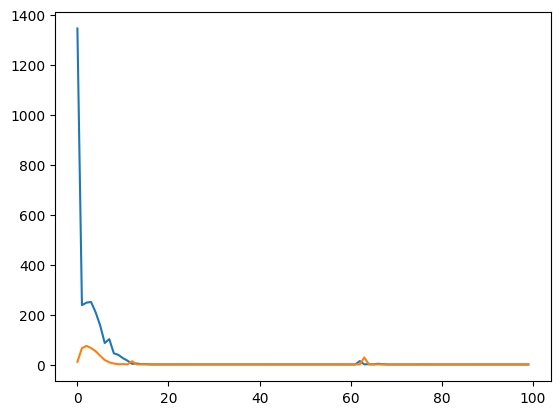

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

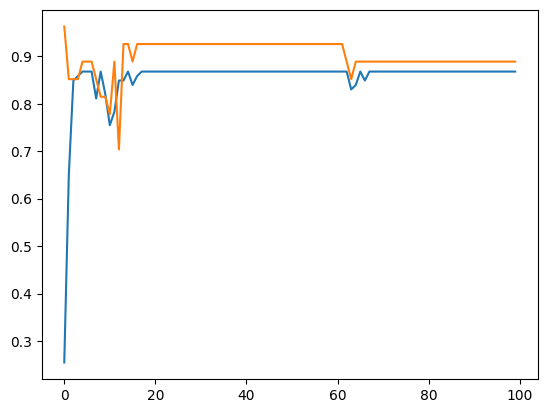

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])